In [710]:
from IPython.core.display import HTML
HTML("<style>h1{color: #000000;border-bottom: solid 2px black}h2{color: #512888;}img{border: solid 1px gray;margin: 5%;}div.cell{border: solid 1px #eeeeee;margin: 10px 0px;}th{color: #ffffff; background-color: #512888;}.honorcode{background-color: #CDBDFF;border-radius: 10px;padding: 10px;}.honorcode span{font-weight:bold;padding-right: 20px;}blockquote{border-left: solid 5px #ffa500}</style><div class='honorcode' markdown='1'><span>Bill Harlan</span>On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.</div>")

## Imports

In [750]:
# Data manipulation
import pandas as pd
import numpy as np
import requests
from lxml import html
import csv
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 70)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#statistical testing
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from scipy.stats import pearsonr
import pingouin as pg

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython import get_ipython
ipython = get_ipython()

# Visualizations
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os  
import plotly.express as px
from plotly.subplots import make_subplots
from pandas.plotting import scatter_matrix

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split #Model Validation

# grid search
from sklearn.model_selection import GridSearchCV
import scikitplot as skplt #Import Confusion Plot

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Classifiers  <<algorithms>>
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

## Data

In [626]:
#import movie_metadata.csv
df = pd.read_csv('../6_MidtermProject/movie_metadata.csv')

In [627]:
#Getting a list of columns
variables = list(df.columns)

In [628]:
#Adding descriptions for each column into a list
descriptions = ['Film colorization. "Black and White" or "Color"', 'Name of the Director of the Movie', 'Number of critical reviews on imdb', 
                'Duration in minutes', 'Number of likes of the Director on his Facebook Page', 'Number of likes of the Actor_3 on his/her Facebook Page',
                'Other actor starring in the movie', 'Number of likes of the Actor_1 on his/her Facebook Page', 'Gross earnings of the movie in Dollars', 'Film categorization like "Animation", "Comedy", "Romance", "Horror", "Sci-Fi", "Action", "Family"',
                'Primary actor starring in the movie', 'Title of the Movie', 'Number of people who voted for the movie', 'Total number of facebook likes of the entire cast of the movie',
                'Other actor starring in the movie', "Number of the actor who featured in the movie poster", "Keywords describing the movie plot", "IMDB link of the movie",
                "Number of users who gave a review", "English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc", "Country where the movie is produced", "Content rating of the movie",
                "Budget of the movie in Dollars", "The year in which the movie is released", "Number of likes of the Actor_2 on his/her Facebook Page", "IMDB Score", 
                "Aspect ratio the movie was made in", "Number of Facebook likes in the movie page"]

In [629]:
#Creating a list of data types
types = list(df.dtypes)

In [630]:
#creating a dataframe of hte variable names, the data type and the descriptions of each variable
df_col_desc = pd.DataFrame(zip(variables,types,descriptions))
df_col_desc = df_col_desc.rename(columns={0:'Variable Name',1:'Data Type',2:'Descriptions'})

In [631]:
#reordering columns to make logical sense
df = df[['movie_title','genres','title_year', 'color', 'aspect_ratio', 'duration',
        'language', 'country', 'content_rating', 'director_name', 'budget', 'gross', 
        'plot_keywords', 'facenumber_in_poster', 'actor_1_name', 'actor_1_facebook_likes', 
        'actor_2_name', 'actor_2_facebook_likes', 'actor_3_name', 'actor_3_facebook_likes', 
        'cast_total_facebook_likes', 'movie_facebook_likes', 'director_facebook_likes',
        'num_critic_for_reviews', 'num_user_for_reviews', 'num_voted_users', 
        'movie_imdb_link', 'imdb_score' 
        ]]

In [632]:
#creating copy of df for future use
df_copy = df
df_copy = df_copy.dropna()
df_copy['profit'] = df_copy['gross'] - df_copy['budget'].astype(int)

# Business Understanding

## What are the project's goals?

> The goal of the project is to identify factors that can predict the success of a movie. For the purpose of this study we will use the IMDB Score as the measurement of "success" of a movie. The higher the IMDB score, the more successfull the movie was.  There are other measures as well that will not be discussed in this project including profit, length of time in theatres, and awards won.

## If you’re hired as a data/business analyst to predict how well a movie will perform in theaters, what kind of data would you collect?

>If I was hired to analyze and predict how well a movie will perform in theatres I would collect a lot of the same data collected here.  Perhaps a little more in depth.  This data only includes looking at the actor's or cast's facebook status, but popularity of an actor comes from many other sources.  First there are more modern social media platforms that actor are on.  Second, some online reading suggests that an actor who has won prestigious awards can have a large impact on success of a movie as their reputation positively influences any movie they are in.
>
>I would also collect more information about what has been written and said by critics. Some online reading suggests that not only how highly critics speak of movies, but also the number of critics reviewing a movie can positive or negative impact on the success of a movie in the theatres.
>
>A few specific things I would add to the data collected in this data set include:
>
>* Screen Actor Guild Awards won by cast and director, producer etc...
>* Golden Glob Awards won
>* Oscars won
>* Cannes Film Festival awards
>* Screen Actor's Guild awards
>* Number of critics reviweing in regional and national publications
>* Average rating of critic reviews in regional and national publications
>* Number of magazine covers the movie and or actors appear on.

# Data Understanding

## Data description and types

### Shape of data

In [633]:
df.shape     # number of rows and columns

(5043, 28)

### Variable names, types and descriptions

In [634]:
df_col_desc

,Variable Name,Data Type,Descriptions
0,color,object,"Film colorization. ""Black and White"" or ""Color"""
1,director_name,object,Name of the Director of the Movie
2,num_critic_for_reviews,float64,Number of critical reviews on imdb
3,duration,float64,Duration in minutes
4,director_facebook_likes,float64,Number of likes of the Director on his Faceboo...
5,actor_3_facebook_likes,float64,Number of likes of the Actor_3 on his/her Face...
6,actor_2_name,object,Other actor starring in the movie
7,actor_1_facebook_likes,float64,Number of likes of the Actor_1 on his/her Face...
8,gross,float64,Gross earnings of the movie in Dollars
9,genres,object,"Film categorization like ""Animation"", ""Comedy""..."


>This data includes 28 columns of data and 5043 rows or records. Of the 28 colums 13 of them are float64 or decimals, three of them are int64 or whole numbers, and 12 are objects or strings.
>
>The following seven fields have no null value: genres, movie_title, num_voted_users, cast_total_facebook_likes, movie_imdb_link, imdb_score, and movie_facebook_likes.
>
>There are 21 fields that contain one or more null values. The gross revenue has the must null values with 884 rows missing data.
>
>There are a number of categorical variables in the data set including aspect_ration, content_rating, language, genre, and color.

## Data quality issues

>There are a number of data quality issues that need to be cleaned or addressed for a good data set.
>
>* There are a number of rows with missing data.  Some for columns that won't be significant, others will require removing the row.
>* For the categorical variables we'll need to create some dumbie variables to better understand the correlation with those variables to the overall IMBDB score. 
>* There are some variables that have have leading and/or trailing white spaces which should be removed to maintain a clean data set.
>* There are a couple of extra columns such as IMDB Link that can be removed as they have no implication on this study.

## Identify value counts of a selective list of columns considered to be important to predict a movie’s success

### Count by year

In [641]:
col_name = 'title_year'
different_title_year = len(df[col_name].value_counts())
max_title_year = pd.DataFrame(df[col_name].value_counts().head(1))
max_title_year_name = max_title_year.index.item()
max_title_year_value = max_title_year[col_name].item()
df[col_name].value_counts().head(10)

2009.0    260
2014.0    252
2006.0    239
2013.0    237
2010.0    230
2015.0    226
2011.0    225
2008.0    225
2012.0    221
2005.0    221
Name: title_year, dtype: int64

### Count by Genre

In [643]:
col_name = 'genres'
different_genres = len(df[col_name].value_counts())
max_genres = pd.DataFrame(df[col_name].value_counts().head(1))
max_genres_name = max_genres.index.item()
max_genres_value = max_genres[col_name].item()
df[col_name].value_counts().head(10)

Drama                          236
Comedy                         209
Comedy|Drama                   191
Comedy|Drama|Romance           187
Comedy|Romance                 158
Drama|Romance                  152
Crime|Drama|Thriller           101
Horror                          71
Action|Crime|Drama|Thriller     68
Action|Crime|Thriller           65
Name: genres, dtype: int64

### Grouping by country

In [645]:
col_name = 'country'
different_country = len(df[col_name].value_counts())
max_country = pd.DataFrame(df[col_name].value_counts().head(1))
max_country_name = max_country.index.item()
max_country_value = max_country[col_name].item()
df[col_name].value_counts().head(10)

USA          3807
UK            448
France        154
Canada        126
Germany        97
Australia      55
India          34
Spain          33
China          30
Italy          23
Name: country, dtype: int64

### Grouping by color

In [647]:
col_name = 'color'
different_color = len(df[col_name].value_counts())
max_color = pd.DataFrame(df[col_name].value_counts().head(1))
max_color_name = max_color.index.item()
max_color_value = max_color[col_name].item()
df[col_name].value_counts().head(10)

Color               4815
 Black and White     209
Name: color, dtype: int64

### Grouping by director

In [649]:
col_name = 'director_name'
different_director = len(df[col_name].value_counts())
max_director = pd.DataFrame(df[col_name].value_counts().head(1))
max_director_name = max_director.index.item()
max_director_value = max_director[col_name].item()
df[col_name].value_counts().head(10)

Steven Spielberg     26
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
Ridley Scott         17
Steven Soderbergh    16
Tim Burton           16
Spike Lee            16
Renny Harlin         15
Oliver Stone         14
Name: director_name, dtype: int64

>Any number of these variables may be important in determining the success of a movie. Because such a large number of the variables have to do with social presence of the people involved in a movie, and it may be difficult to differentiate between them, I focused on some of the more categorical variables. They are summarized below.
>
>* There are {{different_title_year}} different years covered by this data.  The most recent is **{{max_title_year_name}}** with **{{max_title_year_value}}**.
>* A total of {{different_genres}} different genre combinations existed.  The most frequent genre was **{{max_genres_name}}** with **{{max_genres_value}}**.
>* {{different_country}} different countries are listed as the country where the movie was produced. **{{max_country_name}}** is the most common with **{{max_country_value}}** movies.
>* Of the two color types **{{max_color_name}}** is the most common with **{{max_color_value}}** movies made.
>* Finally there were {{different_director}} different directors of the movies. **{{max_director_name}}** leads the list with a total of **{{max_director_value}}**.

# Data Preparation


## Nulls

In [650]:
print("Total Missing Values in dataset %d" % df.isnull().sum().sum())
df.isnull().sum()

Total Missing Values in dataset 2698


movie_title                    0
genres                         0
title_year                   108
color                         19
aspect_ratio                 329
duration                      15
language                      12
country                        5
content_rating               303
director_name                104
budget                       492
gross                        884
plot_keywords                153
facenumber_in_poster          13
actor_1_name                   7
actor_1_facebook_likes         7
actor_2_name                  13
actor_2_facebook_likes        13
actor_3_name                  23
actor_3_facebook_likes        23
cast_total_facebook_likes      0
movie_facebook_likes           0
director_facebook_likes      104
num_critic_for_reviews        50
num_user_for_reviews          21
num_voted_users                0
movie_imdb_link                0
imdb_score                     0
dtype: int64

In [651]:
df = df.dropna()

In [652]:
print("Total Missing Values in dataset %d" % df.isnull().sum().sum())
print("There are still %d remaining rows after removing nulls" % len(df))

Total Missing Values in dataset 0
There are still 3756 remaining rows after removing nulls


## Categorical Variables

In [660]:
# Creating Dummy Variables for all categorical variables
dummies = []
#list of categorical variables
cols = ['color', 'aspect_ratio', 'language', 'country', 'content_rating']
#create dummies and append them to dummies
for col in cols:
    dummies.append(pd.get_dummies(df[col], drop_first=True, prefix=col))
#concatenate all dummies
df_dummies = pd.concat(dummies, axis = 1)
#add dummies to dataframe
df_categories = pd.concat((df,df_dummies), axis=1)
#drop all categorical variables
for col in cols:
    df_categories = df_categories.drop(col, axis=1)
    
df_categories.head()

,movie_title,genres,title_year,duration,director_name,budget,gross,plot_keywords,facenumber_in_poster,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,director_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,movie_imdb_link,imdb_score,USA,English,color_Color,aspect_ratio_1.33,aspect_ratio_1.37,aspect_ratio_1.5,aspect_ratio_1.66,aspect_ratio_1.75,aspect_ratio_1.77,aspect_ratio_1.78,aspect_ratio_1.85,aspect_ratio_2.0,aspect_ratio_2.2,aspect_ratio_2.24,aspect_ratio_2.35,aspect_ratio_2.39,aspect_ratio_2.4,aspect_ratio_2.55,aspect_ratio_2.76,aspect_ratio_16.0,language_Arabic,language_Aramaic,language_Bosnian,language_Cantonese,language_Czech,language_Danish,language_Dari,language_Dutch,language_English,language_Filipino,language_French,language_German,language_Hebrew,language_Hindi,language_Hungarian,language_Indonesian,language_Italian,language_Japanese,language_Kazakh,language_Korean,language_Mandarin,language_Maya,language_Mongolian,language_None,language_Norwegian,language_Persian,language_Portuguese,language_Romanian,language_Russian,language_Spanish,language_Thai,language_Vietnamese,language_Zulu,country_Argentina,country_Aruba,country_Australia,country_Belgium,country_Brazil,country_Canada,country_Chile,country_China,country_Colombia,country_Czech Republic,country_Denmark,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Japan,country_Mexico,country_Netherlands,country_New Line,country_New Zealand,country_Norway,country_Official site,country_Peru,country_Poland,country_Romania,country_Russia,country_South Africa,country_South Korea,country_Spain,country_Taiwan,country_Thailand,country_UK,country_USA,country_West Germany,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,2009.0,178.0,James Cameron,237000000.0,760505847.0,avatar|future|marine|native|paraplegic,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,4834,33000,0.0,723.0,3054.0,886204,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,7.9,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,2007.0,169.0,Gore Verbinski,300000000.0,309404152.0,goddess|marriage ceremony|marriage proposal|pi...,0.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,48350,0,563.0,302.0,1238.0,471220,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,7.1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,Spectre,Action|Adventure|Thriller,2015.0,148.0,Sam Mendes,245000000.0,200074175.0,bomb|espionage|sequel|spy|terrorist,1.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0,11700,85000,0.0,602.0,994.0,275868,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,6.8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,The Dark Knight Rises,Action|Thriller,2012.0,164.0,Christopher Nolan,250000000.0,448130642.0,deception|imprisonment|lawlessness|police offi...,0.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,106759,164000,22000.0,813.0,2701.0,1144337,http://www.imdb.com/title/tt1

In [661]:
#This allows me to see some information about the categorical variables.
#the with pd.option allows me to locally change the max 
#     number of rows visible for this cell.
with pd.option_context("display.max_rows", 10):
   df_categories.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
title_year,3756.0,2002.98,9.890000e+00,1927.0,1999.00,2004.0,2010.00,2.016000e+03
duration,3756.0,110.26,2.265000e+01,37.0,96.00,106.0,120.00,3.300000e+02
budget,3756.0,46236849.64,2.260103e+08,218.0,10000000.00,25000000.0,50000000.00,1.221550e+10
gross,3756.0,52612824.24,7.031787e+07,162.0,8270232.75,30093107.0,66881940.75,7.605058e+08
facenumber_in_poster,3756.0,1.38,2.040000e+00,0.0,0.00,1.0,2.00,4.300000e+01
...,...,...,...,...,...,...,...,...
content_rating_PG-13,3756.0,0.35,4.800000e-01,0.0,0.00,0.0,1.00,1.000000e+00
content_rating_Passed,3756.0,0.00,3.000000e-02,0.0,0.00,0.0,0.00,1.000000e+00
content_rating_R,3756.0,0.45,5.000000e-01,0.0,0.00,0.0,1.00,1.000000e+00
content_rating_Unrated,3756.0,0.01,8.000000e-02,0.0,0.00,0.0,0.00,1.000000e+00


>Many of the countries have had very few movies made, making it very difficult to determine their significance. I'll only consider if being produced in the USA is signficant. I will do the same with language being = english.

In [662]:
df['USA'] = np.where(df['country']=='USA', 1, 0)
df['English'] = np.where(df['language'] == 'English', 1, 0)
df.head()

,movie_title,genres,title_year,color,aspect_ratio,duration,language,country,content_rating,director_name,budget,gross,plot_keywords,facenumber_in_poster,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,director_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,movie_imdb_link,imdb_score,USA,English
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,2009.0,Color,1.78,178.0,English,USA,PG-13,James Cameron,237000000.0,760505847.0,avatar|future|marine|native|paraplegic,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,4834,33000,0.0,723.0,3054.0,886204,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,7.9,1,1
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,2007.0,Color,2.35,169.0,English,USA,PG-13,Gore Verbinski,300000000.0,309404152.0,goddess|marriage ceremony|marriage proposal|pi...,0.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,48350,0,563.0,302.0,1238.0,471220,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,7.1,1,1
2,Spectre,Action|Adventure|Thriller,2015.0,Color,2.35,148.0,English,UK,PG-13,Sam Mendes,245000000.0,200074175.0,bomb|espionage|sequel|spy|terrorist,1.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0,11700,85000,0.0,602.0,994.0,275868,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,6.8,0,1
3,The Dark Knight Rises,Action|Thriller,2012.0,Color,2.35,164.0,English,USA,PG-13,Christopher Nolan,250000000.0,448130642.0,deception|imprisonment|lawlessness|police offi...,0.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,106759,164000,22000.0,813.0,2701.0,1144337,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,8.5,1,1
5,John Carter,Action|Adventure|Sci-Fi,2012.0,Color,2.35,132.0,English,USA,PG-13,Andrew Stanton,263700000.0,73058679.0,alien|american civil war|male nipple|mars|prin...,1.0,Daryl Sabara,640.0,Samantha Morton,632.0,Polly Walker,530.0,1873,24000,475.0,462.0,738.0,212204,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,6.6,1,1


## Dealing with Genres

>Its necessary to break apart the genres to determine if a specific genre is more successfull. To do this I'm using the piece of code from a classmate posted on cavas.

In [663]:
df_categories = df_categories.join(df_categories.pop('genres').str.get_dummies('|'))
df_categories.head()

,movie_title,title_year,duration,director_name,budget,gross,plot_keywords,facenumber_in_poster,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,director_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,movie_imdb_link,imdb_score,USA,English,color_Color,aspect_ratio_1.33,aspect_ratio_1.37,aspect_ratio_1.5,aspect_ratio_1.66,aspect_ratio_1.75,aspect_ratio_1.77,aspect_ratio_1.78,aspect_ratio_1.85,aspect_ratio_2.0,aspect_ratio_2.2,aspect_ratio_2.24,aspect_ratio_2.35,aspect_ratio_2.39,aspect_ratio_2.4,aspect_ratio_2.55,aspect_ratio_2.76,aspect_ratio_16.0,language_Arabic,language_Aramaic,language_Bosnian,language_Cantonese,language_Czech,language_Danish,language_Dari,language_Dutch,language_English,language_Filipino,language_French,language_German,language_Hebrew,language_Hindi,language_Hungarian,language_Indonesian,language_Italian,language_Japanese,language_Kazakh,language_Korean,language_Mandarin,language_Maya,language_Mongolian,language_None,language_Norwegian,language_Persian,language_Portuguese,language_Romanian,language_Russian,language_Spanish,language_Thai,language_Vietnamese,language_Zulu,country_Argentina,country_Aruba,country_Australia,country_Belgium,country_Brazil,country_Canada,country_Chile,country_China,country_Colombia,country_Czech Republic,country_Denmark,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Japan,country_Mexico,country_Netherlands,country_New Line,country_New Zealand,country_Norway,country_Official site,country_Peru,country_Poland,country_Romania,country_Russia,country_South Africa,country_South Korea,country_Spain,country_Taiwan,country_Thailand,country_UK,country_USA,country_West Germany,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Avatar,2009.0,178.0,James Cameron,237000000.0,760505847.0,avatar|future|marine|native|paraplegic,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,4834,33000,0.0,723.0,3054.0,886204,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,7.9,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,Pirates of the Caribbean: At World's End,2007.0,169.0,Gore Verbinski,300000000.0,309404152.0,goddess|marriage ceremony|marriage proposal|pi...,0.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,48350,0,563.0,302.0,1238.0,471220,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,7.1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,Spectre,2015.0,148.0,Sam Mendes,245000000.0,200074175.0,bomb|espionage|sequel|spy|terrorist,1.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0,11700,85000,0.0,602.0,994.0,275868,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,6.8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,2012.0,164.0,Christopher Nolan,250000000.0,448130642.

## Adding columns

In [664]:
# Adding a column to show the profit of each movie
df_categories['profit'] = df_categories['gross'] - df_categories['budget'].astype(int)

In [665]:
# Adding a column to show return on investment 
df_categories['roi'] = round(df_categories['profit'] / df_categories['budget'], 2)

In [669]:
# Adding a category to group content ratings into a clean or not clean category.
df_categories['clean'] = np.where((df_categories['content_rating_G']== 1) | 
                       (df_categories['content_rating_GP']== 1) |
                       (df_categories['content_rating_PG']== 1) |
                         (df_categories['content_rating_PG-13']== 1) |
                        (df_categories['content_rating_Passed']== 1), 1, 0)

In [670]:
#Creating 5 bins for imdb score
#This was borrowed from the solution provided by Dr. Chae on the canvas forum.
df_categories['imdbscores_bins'] = pd.cut(df_categories['imdb_score'], bins=[0, 2, 4, 6, 8, 10], labels=[1,2,3,4,5])
df_categories['imdbscores_bins'] = df_categories['imdbscores_bins'].astype(int)
# see the result
df_categories.head()

,movie_title,title_year,duration,director_name,budget,gross,plot_keywords,facenumber_in_poster,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,director_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,movie_imdb_link,imdb_score,USA,English,color_Color,aspect_ratio_1.33,aspect_ratio_1.37,aspect_ratio_1.5,aspect_ratio_1.66,aspect_ratio_1.75,aspect_ratio_1.77,aspect_ratio_1.78,aspect_ratio_1.85,aspect_ratio_2.0,aspect_ratio_2.2,aspect_ratio_2.24,aspect_ratio_2.35,aspect_ratio_2.39,aspect_ratio_2.4,aspect_ratio_2.55,aspect_ratio_2.76,aspect_ratio_16.0,language_Arabic,language_Aramaic,language_Bosnian,language_Cantonese,language_Czech,language_Danish,language_Dari,language_Dutch,language_English,language_Filipino,language_French,language_German,language_Hebrew,language_Hindi,language_Hungarian,language_Indonesian,language_Italian,language_Japanese,language_Kazakh,language_Korean,language_Mandarin,language_Maya,language_Mongolian,language_None,language_Norwegian,language_Persian,language_Portuguese,language_Romanian,language_Russian,language_Spanish,language_Thai,language_Vietnamese,language_Zulu,country_Argentina,country_Aruba,country_Australia,country_Belgium,country_Brazil,country_Canada,country_Chile,country_China,country_Colombia,country_Czech Republic,country_Denmark,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Japan,country_Mexico,country_Netherlands,country_New Line,country_New Zealand,country_Norway,country_Official site,country_Peru,country_Poland,country_Romania,country_Russia,country_South Africa,country_South Korea,country_Spain,country_Taiwan,country_Thailand,country_UK,country_USA,country_West Germany,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,profit,roi,clean,imdbscores_bins
0,Avatar,2009.0,178.0,James Cameron,237000000.0,760505847.0,avatar|future|marine|native|paraplegic,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,4834,33000,0.0,723.0,3054.0,886204,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,7.9,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,523505847.0,2.21,1,4
1,Pirates of the Caribbean: At World's End,2007.0,169.0,Gore Verbinski,300000000.0,309404152.0,goddess|marriage ceremony|marriage proposal|pi...,0.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,48350,0,563.0,302.0,1238.0,471220,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,7.1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9404152.0,0.03,1,4
2,Spectre,2015.0,148.0,Sam Mendes,245000000.0,200074175.0,bomb|espionage|sequel|spy|terrorist,1.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0,11700,85000,0.0,602.0,994.0,275868,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,6.8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-449

In [671]:
#renaming my completed dataset back to df
df = df_categories

# Business Intelligence



>Lets start by looking at same basic charts and graphs to understand how our data is distributed.

In [672]:
fig = px.histogram(df, x="title_year")
fig.update_layout(
    title_text='Movies produced by year (Fig 1)', # title of plot
    xaxis_title_text='Year', # xaxis label
    yaxis_title_text='Number of movies', # yaxis label
)

>Figure 1 clearly demonstrates the exponential increase in the number of movies produced each year.  It does however show a slight decline starting around 2010. 

In [673]:
fig = px.histogram(df, x="director_name").update_xaxes(categoryorder="total descending")
fig.update_layout(
    title_text='Movies produced by Director (Fig 2)', # title of plot
    xaxis_title_text='Director', # xaxis label
    yaxis_title_text='Number of movies', # yaxis label
)

>Figure 2 demonstrates how there are a few popular directors who produce a large number of movies, and then many directors who have produced one or two movies.

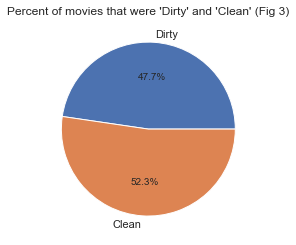

In [674]:
df_clean = df.groupby('clean').size().reset_index()
df_clean['clean'] = np.where(df_clean['clean']==1, "Clean", "Dirty")
plt.pie(df_clean[0], autopct='%1.1f%%', labels=df_clean['clean'])
plt.title("Percent of movies that were 'Dirty' and 'Clean' (Fig 3)");

>Figure 3 demonstrates the breakdown between "dirty" (movies rated r, x, nc-17, etc...) and "clean" (movies rated g, pg, pg-13, etc...). Its a fairly even split.  The correlation later in the report will show that "dirty" movies will perform slightly better.

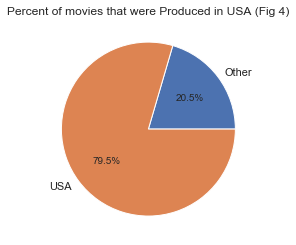

In [675]:
df_usa = df.groupby('USA').size().reset_index()
df_usa['USA'] = np.where(df_usa['USA']==1, "USA", "Other")
plt.pie(df_usa[0], autopct='%1.1f%%', labels=df_usa['USA'])
plt.title("Percent of movies that were Produced in USA (Fig 4)");

>Figure 4 demonstrates that nearly 80% of all movies in this study were produced in the U.S. 

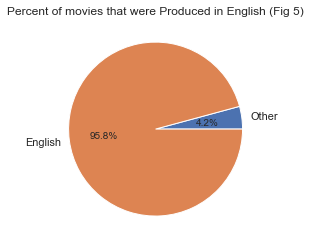

In [676]:
df_english = df.groupby('English').size().reset_index()
df_english['English'] = np.where(df_english['English']==1, "English", "Other")
plt.pie(df_english[0], autopct='%1.1f%%', labels=df_english['English'])
plt.title("Percent of movies that were Produced in English (Fig 5)");

>Figure 5 unsurprisingly demonstrates that more than 95% of movies included in this study were made in the English Language.  Which means a large number of movies not produced in the U.S. or U.K were still produced in English.

In [677]:
df_topdirect = pd.DataFrame(df.groupby('director_name')['imdb_score'].mean()\
                .sort_values(ascending=False).head(20).reset_index())
fig = px.bar(df_topdirect, y='director_name', x='imdb_score', orientation='h').update_yaxes(categoryorder="total ascending")
fig.update_layout(
    title_text='Top 20 directors by IMDB Score (Fig 6)', # title of plot
    xaxis_title_text='Director', # xaxis label
    yaxis_title_text='Mean IMDB Score', # yaxis label
)

>Figure 6 shows the breakdown of the top 20 directors in this study based on their average IMDB Score. Many older directors are included in this list.  And not as many of the directors who have done the most films.

In [678]:
df_topyear = pd.DataFrame(df.groupby('title_year')['imdb_score'].mean()\
                .sort_values(ascending=False).reset_index())
fig = px.bar(df_topyear, x='title_year', y='imdb_score').update_yaxes(categoryorder="total ascending")
fig.update_layout(
    title_text='Mean IMDB Score by Year (Fig 7)', # title of plot
    xaxis_title_text='Year', # xaxis label
    yaxis_title_text='Mean IMDB Score', # yaxis label
)

>Figure 7 demonstrates the average IMDB score for each year of movies in this study.  You can see a slight trend of movies on the average having lower scores in the later years.  This can partiall be attributed to the sheer number of movies being produced and the number of bad movies being produced to lower the average.

In [679]:
dfprofit=pd.DataFrame(df.groupby('imdbscores_bins')['profit'].mean()).reset_index(0)
dfbudget=pd.DataFrame(df.groupby('imdbscores_bins')['budget'].mean()).reset_index(0)

In [680]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=dfprofit['imdbscores_bins'],
    y=dfprofit['profit'],
    name='Profit',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=dfbudget['imdbscores_bins'],
    y=dfbudget['budget'],
    name='Budget',
    marker_color='lightsalmon'
))
fig.show();

>Figure 10 shows the average profit and budget of movies in each of five "bins" of IMDB Scores.  Bin 1 is an IMDB score of 0-2, Bin 2 is 2-4, etc... While there doesn't appear to be a strong correlation between budget, gross revenue and profit and their IMDB Score, I believe if a studio's goal is to make a profit, which it usually is they need to either go all in or go on a very cheap budget.

# Correlation Analysis

In [683]:
#Looking at the correlation of all the variables included in my dataFrame
with pd.option_context("display.max_rows", 130):
    df.corr()['imdb_score'].sort_values().head().T
    df.corr()['imdb_score'].sort_values().tail().T

Comedy             -0.209621
Horror             -0.174799
clean              -0.173114
language_English   -0.172785
English            -0.172785
Name: imdb_score, dtype: float64

num_critic_for_reviews    0.347886
duration                  0.366221
num_voted_users           0.482430
imdbscores_bins           0.872775
imdb_score                1.000000
Name: imdb_score, dtype: float64

In [684]:
#Creating a dataframe of just genres and score to create heatmap.
genres = {'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 
          'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 
          'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 
          'War', 'Western','imdb_score','imdbscores_bins'}
df_genres = df[genres]
df_genres = df_genres.reindex(sorted(df_genres.columns), axis=1)
df_genres.corr()['imdb_score'].sort_values().T

Comedy            -0.209621
Horror            -0.174799
Action            -0.097305
Family            -0.087041
Fantasy           -0.070233
Thriller          -0.054389
Sci-Fi            -0.051067
Music             -0.023560
Romance           -0.013912
Adventure         -0.007507
Mystery            0.002772
Film-Noir          0.019079
Musical            0.020180
Sport              0.024540
Crime              0.036472
Western            0.039227
Animation          0.052715
Documentary        0.054596
War                0.114981
History            0.132741
Biography          0.170922
Drama              0.309141
imdbscores_bins    0.872775
imdb_score         1.000000
Name: imdb_score, dtype: float64

>I believe this is very important as we look at the success of different genres.  Drama and Biographies, histors and war all score very well.  Comedies and Horrors are the worst performing.

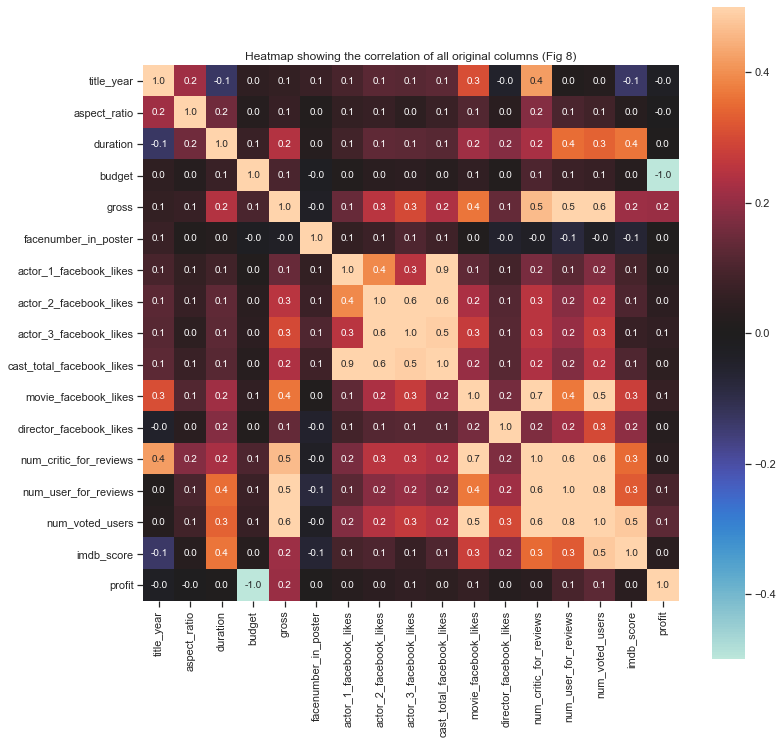

In [685]:
plt.figure(figsize=(12,12))
sns.heatmap(df_copy.corr(), vmax=.5, vmin=-.5, square=True, annot=True, center=0, fmt=".1f")
plt.title("Heatmap showing the correlation of all original columns (Fig 8)");

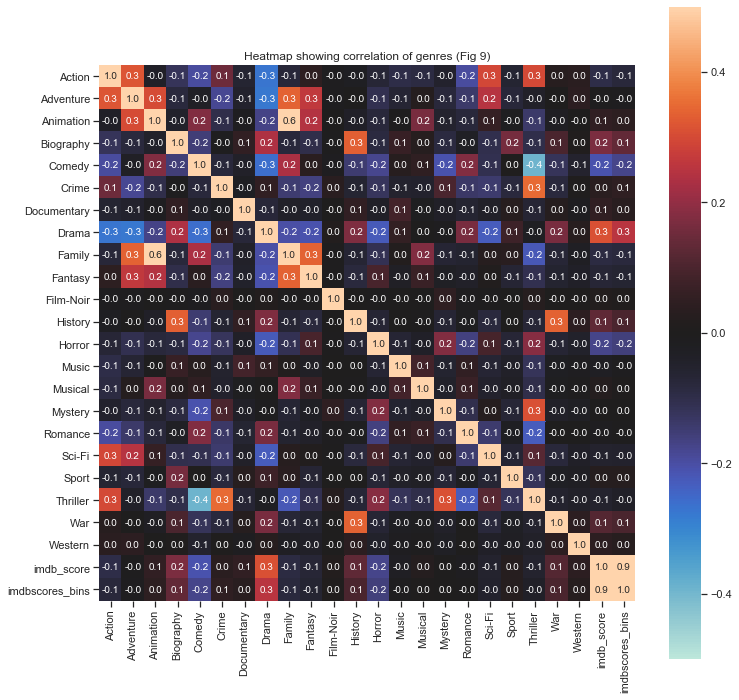

In [686]:
plt.figure(figsize=(12,12))
sns.heatmap(df_genres.corr(), vmax=.5, vmin=-.5, square=True, annot=True, center=0, fmt=".1f")
plt.title("Heatmap showing correlation of genres (Fig 9)");

>In looking at the correlation between all of the variables and the IMDB score a few observations come to mind that I would like to explore further. The heatmap of Figure 8 demonstrates the corrrelation between all of the original columns.
>
>* The year of the movie has a negative correlaton with its IMDB score.  This correlates with the graph in Figure 7 (Fig 7) showing that more recent movies have a lower mean score. That number can and probably is influenced by the sheer number 
>* The Drama genre has the strongest positive correlation to IMDB Score, while a comedy has the strongest negative correlation. Figure 9 demonstrates the correlation between all of the genres.
>* If a movie is "clean" it is likely to have a lower IMDB Score.  This is supported by the largest postive correlation in content rating being "R" at .15 while PG-13 and PG are negative correlations at -.13 and -.06 respectively.
>* In general the number of likes on facebook of the actors appear to have very little effect on the score.  As for the Movie's likes and the director's likes, that appears to have more of an impact and a strong positive correlation.
>* The number of critical reviews, user reviews and user votes also have a strong correlation with the imdb_score and success.  That makes sense as success is being measured by the imdb_score is a calculation of those users and reviews on the site.  Which means it may not be the best measure of success for a movie overall.

# Mid-term Storytelling

>As a summary of all of the material I believe that one can deduce a formula that **"might"** result in a more likely to be successful movie.  However there are a few things that are out of the control of a studio.  One apparent factor that is out of the control of the studio is when the movie was produced.  The negative correlation indicates that older movies, in general scored slightly better.  This could be accounted for however by a number of things.  Obviously IMDB didn't exist at the time of those movies coming out. So the recollection of the movie may have a nostalgic factor causing people to remember them as being better than they actually were.  Or someone might only go back and watch those movies if they remember liking them, introducing a bias towards those older movies.  Also, there were simply far fewer movies produced. Meaning only the best actors were being included in them most likely and more focus and resources could be spent on them.
>
>Another factor that is more difficult to control is the amount of critical reviews a movie receives.  While this data only looks at the critical reviews from IMDB, a broader look at the overall reviews might shed more light on this data.  However the correlation in Figure 8 shows a correlation of .3 between the number of critical reviews and the overall score.  Marketing dollars and efforts could impact the number of critical reviews, so its not completely out of the studio's hands.
>
>On the alternative side, there are some factors that a studio should explore. One is finding the right director. While facebook is not the end-all be-all of measureing the popularity of a director, it does have a .2 positive correlation to the overall imdb score.  And it stands to reason, a director is likely to be popular if he directs good movies.  If you like movies directed by someone, you are more likely to go the movie, and also more likely to like the movie.  Director's usually keep a lot of the same style movie-to-movie meaning you are likely to feel similarly about other movies. The heatmap in Figure 8 also demonstrates that the more likes the movie page has on facebook the higher the imdb score likely to be.  This isn't too shocking considering the same users likely to be on social media and to interact with a movie are probably the same ones likely to go cast votes for a movie on IMDB.
>
>Other factors that a studio can congtrol include, picking the right genre.  Drama, biographay, history, and war movies all seem to score well on the IMDB scale.  Comedies and horrors should probably be avoided if trying to achieve a high score.  Also it appears that family or "clean" movies don't score as well.  Movies that are rated too badly, such as nc-17 don't perform as well, but a movie rated R has a stronger positive correlation than the other ratings.
>
>In conclusion, to have a high chance at a successful movie, I would recommend the following
>* Get a big name to be your director who is very popular.
>* Invest in the movie to maximize profits
>* Make the movie a drama, perhaps a wartime or historical drama to maximize the chance of scoring well.
>* Don't make the movie too wholesome.  Rated R movies score well in IMDB.
>* Invest in the marketing, have a successful social media presence that drums up people interacting with the movie and IMDB. The positive attention will drive up the IMDB Score.

# Regression Model

In [701]:
#prepping number only dataframe
df_numbers = df.drop(columns=['movie_title',
              'director_name','plot_keywords',
              'actor_1_name','actor_2_name','actor_3_name',
              'movie_imdb_link'], axis=1)


In [702]:
#assigning columns to X and Y variables
y = df_numbers['imdb_score'] 
x = df_numbers.drop(['imdb_score'], axis =1)
#x = x.drop(['movie_title','color','language','country','director_name','content_rating','plot_keywords','actor_1_name','actor_2_name','actor_3_name','movie_imdb_link'], axis =1)
x = df[['title_year','Drama','num_user_for_reviews','clean','num_critic_for_reviews','num_voted_users']]

In [703]:
#Splitting data into test and train groups.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=18)

## Linear Regression

In [704]:
model1 = lm.LinearRegression()
model1.fit(x_train, y_train)   
prd_y = model1.predict(x_test)
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in x.columns ]
list(zip(xcolumns, coef))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[('title_year', '-0.029'),
 ('Drama', '0.672'),
 ('num_user_for_reviews', '-0.001'),
 ('clean', '-0.236'),
 ('num_critic_for_reviews', '0.003'),
 ('num_voted_users', '0.000')]

In [705]:
print("mean square error: ", mean_squared_error(y_test, prd_y))
print("variance or r-squared: ", explained_variance_score(y_test, prd_y))

mean square error:  0.6613536244004226
variance or r-squared:  0.42222998504617504


## Random Forest Regressor

In [706]:
regr = RandomForestRegressor(random_state=18)
regr.fit(x, y)
regr_predicted = regr.predict(x)

print("mean square error: ", mean_squared_error(y, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y, regr_predicted))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=18, verbose=0,
                      warm_start=False)

mean square error:  0.10535071884984026
variance or r-squared:  0.9055820761838523


>The random forest regressor model gives me a much higher r-squared (0.9056) compared to the r-squared (0.4222) of the linear regressorssion.

# Classification

In [711]:
df_numbers['imdbscore_category'] = pd.cut(df_numbers['imdb_score'], bins=[0,4, 6, 8, 10], labels=['bad','ok','good','excellent'])
df_numbers['imdbscore_category'] = df_numbers['imdbscore_category'].astype('category')

In [714]:
# declare X variables and y variable
y = df_numbers[['imdbscore_category']]
x = df_numbers.drop(['imdb_score','imdbscore_category'], axis=1)

In [715]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=18)

In [716]:
dt = DecisionTreeClassifier()

In [717]:
dt = dt.fit(x_train, y_train) 

In [718]:
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [719]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(x_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(x_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(x_test)))
print("--------------------------------------------------------")
#print(metrics.roc_auc_score(y_test, dt.predict(x_test)))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

1.0
--------------------------------------------------------
[[ 32   0   0   0]
 [  0  56   0   0]
 [  0   0 799   0]
 [  0   0   0 353]]
--------------------------------------------------------
              precision    recall  f1-score   support

         bad       1.00      1.00      1.00        32
   excellent       1.00      1.00      1.00        56
        good       1.00      1.00      1.00       799
          ok       1.00      1.00      1.00       353

    accuracy                           1.00      1240
   macro avg       1.00      1.00      1.00      1240
weighted avg       1.00      1.00      1.00      1240

--------------------------------------------------------


## KNN

In [720]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
# Initialize kNeighborsClassifier() ... name your decision model "knn"
knn = KNeighborsClassifier()

# Train a decision tree model
knn = knn.fit(x_train, y_train)   
#prd_y = model1.predict(X_test)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [722]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, knn.predict(x_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(x_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(x_test)))
print("--------------------------------------------------------")
#print(metrics.roc_auc_score(y_test, knn.predict(x_test)))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.



0.6233870967741936
--------------------------------------------------------
[[  0   0  23   9]
 [  1   1  50   4]
 [  2   5 687 105]
 [  4   1 263  85]]
--------------------------------------------------------
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        32
   excellent       0.14      0.02      0.03        56
        good       0.67      0.86      0.75       799
          ok       0.42      0.24      0.31       353

    accuracy                           0.62      1240
   macro avg       0.31      0.28      0.27      1240
weighted avg       0.56      0.62      0.57      1240

--------------------------------------------------------


## Logistic Regression

In [723]:
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [724]:
#Model evaluation

print(metrics.accuracy_score(y_test, lr.predict(x_test)))
print(metrics.confusion_matrix(y_test, lr.predict(x_test)))
print(metrics.classification_report(y_test, lr.predict(x_test)))
#print(metrics.roc_auc_score(y_test, lr.predict(x_test)))

0.6701612903225806
[[  0   0  27   5]
 [  0  25  29   2]
 [  0   2 765  32]
 [  0   0 312  41]]
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        32
   excellent       0.93      0.45      0.60        56
        good       0.68      0.96      0.79       799
          ok       0.51      0.12      0.19       353

    accuracy                           0.67      1240
   macro avg       0.53      0.38      0.40      1240
weighted avg       0.62      0.67      0.59      1240



>The Decision Tree Classifier gave me a 100% accuracy, far higher than the other two models.

# Feature Selection

## SelectKBest

In [725]:
x.min().sort_values().head(2)

profit   -1.221330e+10
roi      -1.000000e+00
dtype: float64

Because Profit and ROI are negative values, SelectKBest is not an option.

## Recursive Feature Selection

In [727]:
x = x.drop(['imdbscores_bins'], axis=1)

In [730]:
model = LogisticRegression()
rfe = RFE(model, 5)  #asking five best attributes
rfe = rfe.fit(x, y)
# summarize the selection of the attributes
print((rfe.support_))
print((rfe.ranking_))

[False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False  True False False
 False False  True False False False False False False False False False
 False False False]
[ 34  31  43  42  30  37  35  36  38  40  39  32  33  41  28  17   1  65
  82 142  50  92 139  45  15 13

In [731]:
#16,18,46,73,74
#x.head().T
colname1 = df.columns[16]
colname2 = df.columns[18]
colname3 = df.columns[46]
colname4 = df.columns[73]
colname5 = df.columns[74]
RFS_features = np.array([colname1,colname2,colname3,colname4,colname5])
print("The five features identified by Recursive Feasture Selection")
for i in RFS_features:
    print(i)

The five features identified by Recursive Feasture Selection
director_facebook_likes
num_user_for_reviews
language_Czech
language_Vietnamese
language_Zulu


## ExtraTreesClassifier

In [732]:
model_extra = ExtraTreesClassifier()
model_extra.fit(x, y)
print(model_extra.score(x, y))

# display the relative importance of each attribute
print((model_extra.feature_importances_))
print("Features sorted by their rank:")
print(sorted(zip([round(x, 4) for x in model_extra.feature_importances_], x.columns)))

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

1.0
[3.79922366e-02 4.50863223e-02 3.91039352e-02 3.85248807e-02
 2.90464910e-02 3.48066916e-02 3.01815586e-02 3.54691218e-02
 3.19226374e-02 3.81933201e-02 3.78193417e-02 4.93196279e-02
 5.15682395e-02 7.44113633e-02 9.17059882e-03 3.16255174e-03
 4.48294681e-03 2.00247397e-03 2.33531324e-03 1.80143626e-05
 1.30809921e-03 9.90789941e-05 8.70694191e-05 2.15623428e-03
 9.84261842e-03 6.57996288e-05 5.85333937e-04 3.08363500e-05
 8.73882272e-03 6.78194680e-04 4.79393477e-04 5.79033083e-06
 7.58733005e-06 0.00000000e+00 0.00000000e+00 5.46216524e-06
 3.04113975e-04 2.96442231e-05 0.00000000e+00 3.36820210e-04
 1.60332273e-05 0.00000000e+00 2.12534531e-03 3.15746245e-05
 4.33014525e-04 5.16271407e-04 5.40430877e-05 6.18027437e-05
 0.00000000e+00 2.58564152e-04 1.95986663e-04 5.95035593e-04
 3.16714931e-04 3.16257229e-04 2.01764934e-04 0.00000000e+00
 0.00000000e+00 3.52386347e-04 9.00718128e-05 5.76165639e-04
 3.60595283e-04 0.00000000e+00 0.00000000e+00 1.05328194e-03
 0.00000000e+00 6.19

In [733]:
pd.DataFrame(model_extra.feature_importances_, index = x.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).head(5)

,importance
num_voted_users,0.074411
num_user_for_reviews,0.051568
num_critic_for_reviews,0.049320
duration,0.045086
profit,0.041240


>There appears to be three features that rise to the top.  "Num-voted_users" is the highest using ExtraTreesClassifier, which seems to be consistent with previous findings. Also, "num_critic_for_reviews" and "num_user_for_reviews" are above .05.  All the rest are then a larger gap and a large cluster of them at that level.

# Clustering

In [734]:
df_numbers = df_numbers.drop(['imdbscore_category'], axis=1)

In [735]:
df_norm = (df_numbers - df_numbers.mean()) / (df_numbers.max() - df_numbers.min())
df_norm.head()

,title_year,duration,budget,gross,facenumber_in_poster,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,director_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,imdb_score,USA,English,color_Color,aspect_ratio_1.33,aspect_ratio_1.37,aspect_ratio_1.5,aspect_ratio_1.66,aspect_ratio_1.75,aspect_ratio_1.77,aspect_ratio_1.78,aspect_ratio_1.85,aspect_ratio_2.0,aspect_ratio_2.2,aspect_ratio_2.24,aspect_ratio_2.35,aspect_ratio_2.39,aspect_ratio_2.4,aspect_ratio_2.55,aspect_ratio_2.76,aspect_ratio_16.0,language_Arabic,language_Aramaic,language_Bosnian,language_Cantonese,language_Czech,language_Danish,language_Dari,language_Dutch,language_English,language_Filipino,language_French,language_German,language_Hebrew,language_Hindi,language_Hungarian,language_Indonesian,language_Italian,language_Japanese,language_Kazakh,language_Korean,language_Mandarin,language_Maya,language_Mongolian,language_None,language_Norwegian,language_Persian,language_Portuguese,language_Romanian,language_Russian,language_Spanish,language_Thai,language_Vietnamese,language_Zulu,country_Argentina,country_Aruba,country_Australia,country_Belgium,country_Brazil,country_Canada,country_Chile,country_China,country_Colombia,country_Czech Republic,country_Denmark,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Japan,country_Mexico,country_Netherlands,country_New Line,country_New Zealand,country_Norway,country_Official site,country_Peru,country_Poland,country_Romania,country_Russia,country_South Africa,country_South Korea,country_Spain,country_Taiwan,country_Thailand,country_UK,country_USA,country_West Germany,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,profit,roi,clean,imdbscores_bins
0,0.067679,0.231201,0.015616,0.930819,-0.032029,-0.010549,-0.007925,0.003640,-0.010192,0.067754,-0.035102,0.685107,0.537412,0.461851,0.186327,0.204739,0.042066,0.033014,-0.004792,-0.01278,-0.000266,-0.010383,-0.000532,-0.000266,0.990948,-0.423323,-0.000799,-0.002929,-0.000266,-0.529286,-0.002929,-0.000799,-0.000266,-0.000799,-0.000266,-0.000266,-0.000266,-0.000266,-0.001864,-0.000266,-0.000799,-0.000532,-0.000799,0.042066,-0.000266,-0.009052,-0.002662,-0.000266,-0.001331,-0.000266,-0.000532,-0.001864,-0.002662,-0.000266,-0.001331,-0.003994,-0.000266,-0.000266,-0.000266,-0.001065,-0.000799,-0.001331,-0.000266,-0.000266,-0.006124,-0.000799,-0.000266,-0.000266,-0.000799,-0.000266,-0.010383,-0.000266,-0.001331,-0.015708,-0.000266,-0.003461,-0.000266,-0.000799,-0.00213,-0.000266,-0.02689,-0.000266,-0.021299,-0.000266,-0.003461,-0.000532,-0.000266,-0.001331,-0.000266,-0.001065,-0.001864,-0.000266,-0.002929,-0.003994,-0.001597,-0.000799,-0.000266,-0.002929,-0.001065,-0.000266,-0.000266,-0.000266,-0.000532,-0.000799,-0.000799,-0.00213,-0.005591,-0.000532,-0.001065,-0.084665,0.204739,-0.000266,-0.023163,-0.000266,-0.000532,-0.001597,-0.009052,-0.150692,0.651757,-0.000799,-0.452609,-0.005857,-0.002662,0.744675,0.792066,-0.052183,-0.063632,-0.388978,-0.188765,-0.011981,-0.503994,-0.117678,0.865016,-0.000266,-0.03967,-0.104366,-0.040202,-0.025559,-0.102236,-0.228701,0.867945,-0.039404,-0.297391,-0.040469,-0.015708,0.040601,-0.000446,0.476837,0.072151
1,0.045207,0.200485,0.020774,0.337659,-0.032029,0.050389,0.021739,0.009944,0.056070,-0.026802,-0.010623,0.165995,0.178235,0.216251,0.082431,0.204739,0.042066,0.033014,-0.004792,-0.01278,-0.000266,-0.010383,-0.000532,-0.000266,-0.009052,-0.423323,-0.000799,-0.

## K-Means Clustering

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

Text(0.5, 0, 'k')

Text(0, 0.5, 'Average distortion')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

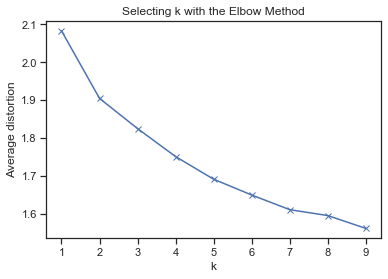

In [736]:
from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(df_norm) 
    meandistortions.append(sum(np.min(cdist(df_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_norm.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

In [757]:
k_means = KMeans(init='k-means++', n_clusters=5, random_state=0)
k_means.fit(x)
k_means.labels_
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [758]:
print(k_means_labels)
print(k_means_cluster_centers)
print(k_means_labels_unique)

[0 0 0 ... 3 3 3]
[[ 2.00360084e+03  1.21096639e+02  9.39758191e+07  1.98943979e+08
   1.18067227e+00  1.16318655e+04  4.14379412e+03  1.83452521e+03
   1.95217269e+04  2.53170378e+04  1.65083824e+03  2.79518908e+02
   7.90972689e+02  3.09963876e+05  9.05462185e-01  9.97899160e-01
   9.76890756e-01  1.05042017e-02  8.40336134e-03  8.67361738e-19
   6.30252101e-03  1.73472348e-18  8.67361738e-19  1.05042017e-02
   3.31932773e-01  2.10084034e-03  2.10084034e-03  2.10084034e-03
   6.17647059e-01  6.30252101e-03  3.36102673e-18  8.67361738e-19
   3.36102673e-18  8.67361738e-19  8.67361738e-19  8.67361738e-19
   8.67361738e-19 -9.32413868e-18  8.67361738e-19  3.36102673e-18
   1.73472348e-18  3.36102673e-18  9.97899160e-01  8.67361738e-19
   4.51028104e-17 -1.17093835e-17  8.67361738e-19 -5.85469173e-18
   8.67361738e-19  1.73472348e-18 -9.32413868e-18 -1.17093835e-17
   8.67361738e-19 -5.85469173e-18  2.10084034e-03  8.67361738e-19
   8.67361738e-19  8.67361738e-19  3.46944695e-18  3.36102

In [759]:
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,3


In [760]:
df2 = df_norm.join(df1)
df2.head()

,title_year,duration,budget,gross,facenumber_in_poster,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,director_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,imdb_score,USA,English,color_Color,aspect_ratio_1.33,aspect_ratio_1.37,aspect_ratio_1.5,aspect_ratio_1.66,aspect_ratio_1.75,aspect_ratio_1.77,aspect_ratio_1.78,aspect_ratio_1.85,aspect_ratio_2.0,aspect_ratio_2.2,aspect_ratio_2.24,aspect_ratio_2.35,aspect_ratio_2.39,aspect_ratio_2.4,aspect_ratio_2.55,aspect_ratio_2.76,aspect_ratio_16.0,language_Arabic,language_Aramaic,language_Bosnian,language_Cantonese,language_Czech,language_Danish,language_Dari,language_Dutch,language_English,language_Filipino,language_French,language_German,language_Hebrew,language_Hindi,language_Hungarian,language_Indonesian,language_Italian,language_Japanese,language_Kazakh,language_Korean,language_Mandarin,language_Maya,language_Mongolian,language_None,language_Norwegian,language_Persian,language_Portuguese,language_Romanian,language_Russian,language_Spanish,language_Thai,language_Vietnamese,language_Zulu,country_Argentina,country_Aruba,country_Australia,country_Belgium,country_Brazil,country_Canada,country_Chile,country_China,country_Colombia,country_Czech Republic,country_Denmark,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Japan,country_Mexico,country_Netherlands,country_New Line,country_New Zealand,country_Norway,country_Official site,country_Peru,country_Poland,country_Romania,country_Russia,country_South Africa,country_South Korea,country_Spain,country_Taiwan,country_Thailand,country_UK,country_USA,country_West Germany,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,profit,roi,clean,imdbscores_bins,cluster
0,0.067679,0.231201,0.015616,0.930819,-0.032029,-0.010549,-0.007925,0.003640,-0.010192,0.067754,-0.035102,0.685107,0.537412,0.461851,0.186327,0.204739,0.042066,0.033014,-0.004792,-0.01278,-0.000266,-0.010383,-0.000532,-0.000266,0.990948,-0.423323,-0.000799,-0.002929,-0.000266,-0.529286,-0.002929,-0.000799,-0.000266,-0.000799,-0.000266,-0.000266,-0.000266,-0.000266,-0.001864,-0.000266,-0.000799,-0.000532,-0.000799,0.042066,-0.000266,-0.009052,-0.002662,-0.000266,-0.001331,-0.000266,-0.000532,-0.001864,-0.002662,-0.000266,-0.001331,-0.003994,-0.000266,-0.000266,-0.000266,-0.001065,-0.000799,-0.001331,-0.000266,-0.000266,-0.006124,-0.000799,-0.000266,-0.000266,-0.000799,-0.000266,-0.010383,-0.000266,-0.001331,-0.015708,-0.000266,-0.003461,-0.000266,-0.000799,-0.00213,-0.000266,-0.02689,-0.000266,-0.021299,-0.000266,-0.003461,-0.000532,-0.000266,-0.001331,-0.000266,-0.001065,-0.001864,-0.000266,-0.002929,-0.003994,-0.001597,-0.000799,-0.000266,-0.002929,-0.001065,-0.000266,-0.000266,-0.000266,-0.000532,-0.000799,-0.000799,-0.00213,-0.005591,-0.000532,-0.001065,-0.084665,0.204739,-0.000266,-0.023163,-0.000266,-0.000532,-0.001597,-0.009052,-0.150692,0.651757,-0.000799,-0.452609,-0.005857,-0.002662,0.744675,0.792066,-0.052183,-0.063632,-0.388978,-0.188765,-0.011981,-0.503994,-0.117678,0.865016,-0.000266,-0.03967,-0.104366,-0.040202,-0.025559,-0.102236,-0.228701,0.867945,-0.039404,-0.297391,-0.040469,-0.015708,0.040601,-0.000446,0.476837,0.072151,0.0
1,0.045207,0.200485,0.020774,0.337659,-0.032029,0.050389,0.021739,0.009944,0.056070,-0.026802,-0.010623,0.165995,0.178235,0.216251,0.082431,0.204739,0.042066,0.033014,-0.004792,-0.01278,-0.000266,-0.010383,-0.000532,-0.000266,-0.009052,-0.423323,-

In [761]:
df2.groupby(['cluster']).size() 

cluster
0.0     435
1.0       1
2.0       4
3.0    2769
4.0       4
dtype: int64

In [762]:
df3 = df.join(df1)
df3.head()

,movie_title,title_year,duration,director_name,budget,gross,plot_keywords,facenumber_in_poster,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,director_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,movie_imdb_link,imdb_score,USA,English,color_Color,aspect_ratio_1.33,aspect_ratio_1.37,aspect_ratio_1.5,aspect_ratio_1.66,aspect_ratio_1.75,aspect_ratio_1.77,aspect_ratio_1.78,aspect_ratio_1.85,aspect_ratio_2.0,aspect_ratio_2.2,aspect_ratio_2.24,aspect_ratio_2.35,aspect_ratio_2.39,aspect_ratio_2.4,aspect_ratio_2.55,aspect_ratio_2.76,aspect_ratio_16.0,language_Arabic,language_Aramaic,language_Bosnian,language_Cantonese,language_Czech,language_Danish,language_Dari,language_Dutch,language_English,language_Filipino,language_French,language_German,language_Hebrew,language_Hindi,language_Hungarian,language_Indonesian,language_Italian,language_Japanese,language_Kazakh,language_Korean,language_Mandarin,language_Maya,language_Mongolian,language_None,language_Norwegian,language_Persian,language_Portuguese,language_Romanian,language_Russian,language_Spanish,language_Thai,language_Vietnamese,language_Zulu,country_Argentina,country_Aruba,country_Australia,country_Belgium,country_Brazil,country_Canada,country_Chile,country_China,country_Colombia,country_Czech Republic,country_Denmark,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Japan,country_Mexico,country_Netherlands,country_New Line,country_New Zealand,country_Norway,country_Official site,country_Peru,country_Poland,country_Romania,country_Russia,country_South Africa,country_South Korea,country_Spain,country_Taiwan,country_Thailand,country_UK,country_USA,country_West Germany,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,profit,roi,clean,imdbscores_bins,cluster
0,Avatar,2009.0,178.0,James Cameron,237000000.0,760505847.0,avatar|future|marine|native|paraplegic,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,4834,33000,0.0,723.0,3054.0,886204,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,7.9,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,523505847.0,2.21,1,4,0.0
1,Pirates of the Caribbean: At World's End,2007.0,169.0,Gore Verbinski,300000000.0,309404152.0,goddess|marriage ceremony|marriage proposal|pi...,0.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,48350,0,563.0,302.0,1238.0,471220,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,7.1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9404152.0,0.03,1,4,0.0
2,Spectre,2015.0,148.0,Sam Mendes,245000000.0,200074175.0,bomb|espionage|sequel|spy|terrorist,1.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0,11700,85000,0.0,602.0,994.0,275868,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,6.8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [827]:
kmeans_profile =[]
Kmeans_profile = pd.DataFrame(df3[df3['cluster'] == 0].mean(),columns=['Cluster 0'])
Kmeans_profile = Kmeans_profile.join(pd.DataFrame(df3[df3['cluster'] == 1].mean(),columns=['Cluster 1']))
Kmeans_profile = Kmeans_profile.join(pd.DataFrame(df3[df3['cluster'] == 2].mean(),columns=['Cluster 2']))
Kmeans_profile = Kmeans_profile.join(pd.DataFrame(df3[df3['cluster'] == 3].mean(),columns=['Cluster 3']))

In [828]:
pd.options.display.float_format = '{:,.2f}'.format
Kmeans_profile

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
title_year,"2,005.90","1,984.00","2,001.50","2,003.12"
duration,119.58,114.00,109.50,110.66
budget,"100,031,151.43","15,000,000.00","16,650,000.00","43,542,683.07"
gross,"110,411,988.79","15,100,000.00","15,169,784.50","51,108,772.95"
facenumber_in_poster,1.18,1.00,1.50,1.46
actor_1_facebook_likes,"10,254.52",695.00,"8,595.25","8,006.95"
actor_2_facebook_likes,"3,435.89",654.00,550.75,"2,056.64"
actor_3_facebook_likes,"1,428.09",563.00,157.00,758.25
cast_total_facebook_likes,"16,634.97","3,444.00","9,533.75","11,815.43"
movie_facebook_likes,"18,418.42",0.00,439.50,"8,734.57"


>The above table profiles eaxh of the four clusters.

## Hierarchical Clustering Algorithm

In [763]:
df_norm.head()

,title_year,duration,budget,gross,facenumber_in_poster,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,director_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,imdb_score,USA,English,color_Color,aspect_ratio_1.33,aspect_ratio_1.37,aspect_ratio_1.5,aspect_ratio_1.66,aspect_ratio_1.75,aspect_ratio_1.77,aspect_ratio_1.78,aspect_ratio_1.85,aspect_ratio_2.0,aspect_ratio_2.2,aspect_ratio_2.24,aspect_ratio_2.35,aspect_ratio_2.39,aspect_ratio_2.4,aspect_ratio_2.55,aspect_ratio_2.76,aspect_ratio_16.0,language_Arabic,language_Aramaic,language_Bosnian,language_Cantonese,language_Czech,language_Danish,language_Dari,language_Dutch,language_English,language_Filipino,language_French,language_German,language_Hebrew,language_Hindi,language_Hungarian,language_Indonesian,language_Italian,language_Japanese,language_Kazakh,language_Korean,language_Mandarin,language_Maya,language_Mongolian,language_None,language_Norwegian,language_Persian,language_Portuguese,language_Romanian,language_Russian,language_Spanish,language_Thai,language_Vietnamese,language_Zulu,country_Argentina,country_Aruba,country_Australia,country_Belgium,country_Brazil,country_Canada,country_Chile,country_China,country_Colombia,country_Czech Republic,country_Denmark,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Japan,country_Mexico,country_Netherlands,country_New Line,country_New Zealand,country_Norway,country_Official site,country_Peru,country_Poland,country_Romania,country_Russia,country_South Africa,country_South Korea,country_Spain,country_Taiwan,country_Thailand,country_UK,country_USA,country_West Germany,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,profit,roi,clean,imdbscores_bins
0,0.067679,0.231201,0.015616,0.930819,-0.032029,-0.010549,-0.007925,0.003640,-0.010192,0.067754,-0.035102,0.685107,0.537412,0.461851,0.186327,0.204739,0.042066,0.033014,-0.004792,-0.01278,-0.000266,-0.010383,-0.000532,-0.000266,0.990948,-0.423323,-0.000799,-0.002929,-0.000266,-0.529286,-0.002929,-0.000799,-0.000266,-0.000799,-0.000266,-0.000266,-0.000266,-0.000266,-0.001864,-0.000266,-0.000799,-0.000532,-0.000799,0.042066,-0.000266,-0.009052,-0.002662,-0.000266,-0.001331,-0.000266,-0.000532,-0.001864,-0.002662,-0.000266,-0.001331,-0.003994,-0.000266,-0.000266,-0.000266,-0.001065,-0.000799,-0.001331,-0.000266,-0.000266,-0.006124,-0.000799,-0.000266,-0.000266,-0.000799,-0.000266,-0.010383,-0.000266,-0.001331,-0.015708,-0.000266,-0.003461,-0.000266,-0.000799,-0.00213,-0.000266,-0.02689,-0.000266,-0.021299,-0.000266,-0.003461,-0.000532,-0.000266,-0.001331,-0.000266,-0.001065,-0.001864,-0.000266,-0.002929,-0.003994,-0.001597,-0.000799,-0.000266,-0.002929,-0.001065,-0.000266,-0.000266,-0.000266,-0.000532,-0.000799,-0.000799,-0.00213,-0.005591,-0.000532,-0.001065,-0.084665,0.204739,-0.000266,-0.023163,-0.000266,-0.000532,-0.001597,-0.009052,-0.150692,0.651757,-0.000799,-0.452609,-0.005857,-0.002662,0.744675,0.792066,-0.052183,-0.063632,-0.388978,-0.188765,-0.011981,-0.503994,-0.117678,0.865016,-0.000266,-0.03967,-0.104366,-0.040202,-0.025559,-0.102236,-0.228701,0.867945,-0.039404,-0.297391,-0.040469,-0.015708,0.040601,-0.000446,0.476837,0.072151
1,0.045207,0.200485,0.020774,0.337659,-0.032029,0.050389,0.021739,0.009944,0.056070,-0.026802,-0.010623,0.165995,0.178235,0.216251,0.082431,0.204739,0.042066,0.033014,-0.004792,-0.01278,-0.000266,-0.010383,-0.000532,-0.000266,-0.009052,-0.423323,-0.000799,-0.

In [765]:
np.random.seed(18) # setting random seed to get the same results each time.
agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(x)
agg.labels_

array([1, 1, 1, ..., 0, 0, 0])

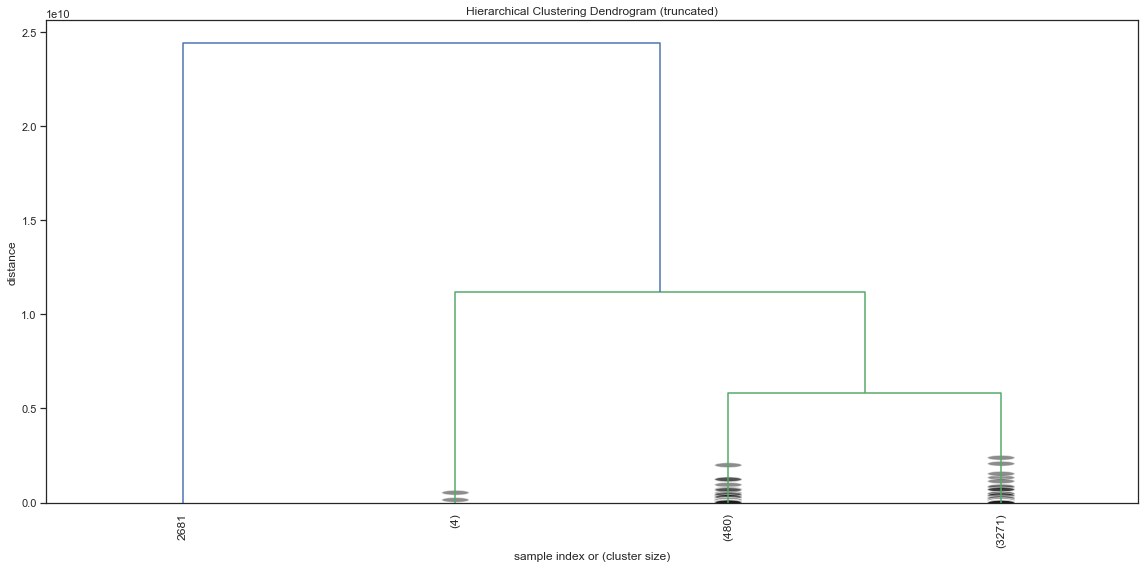

In [770]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(x)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=4,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout(); # fixes margins

In [771]:
df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df1.head()

,cluster
0,1
1,1
2,1
3,1
4,0


In [772]:
df2 = df.join(df1)
df2.head()

,movie_title,title_year,duration,director_name,budget,gross,plot_keywords,facenumber_in_poster,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,director_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,movie_imdb_link,imdb_score,USA,English,color_Color,aspect_ratio_1.33,aspect_ratio_1.37,aspect_ratio_1.5,aspect_ratio_1.66,aspect_ratio_1.75,aspect_ratio_1.77,aspect_ratio_1.78,aspect_ratio_1.85,aspect_ratio_2.0,aspect_ratio_2.2,aspect_ratio_2.24,aspect_ratio_2.35,aspect_ratio_2.39,aspect_ratio_2.4,aspect_ratio_2.55,aspect_ratio_2.76,aspect_ratio_16.0,language_Arabic,language_Aramaic,language_Bosnian,language_Cantonese,language_Czech,language_Danish,language_Dari,language_Dutch,language_English,language_Filipino,language_French,language_German,language_Hebrew,language_Hindi,language_Hungarian,language_Indonesian,language_Italian,language_Japanese,language_Kazakh,language_Korean,language_Mandarin,language_Maya,language_Mongolian,language_None,language_Norwegian,language_Persian,language_Portuguese,language_Romanian,language_Russian,language_Spanish,language_Thai,language_Vietnamese,language_Zulu,country_Argentina,country_Aruba,country_Australia,country_Belgium,country_Brazil,country_Canada,country_Chile,country_China,country_Colombia,country_Czech Republic,country_Denmark,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Japan,country_Mexico,country_Netherlands,country_New Line,country_New Zealand,country_Norway,country_Official site,country_Peru,country_Poland,country_Romania,country_Russia,country_South Africa,country_South Korea,country_Spain,country_Taiwan,country_Thailand,country_UK,country_USA,country_West Germany,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,profit,roi,clean,imdbscores_bins,cluster
0,Avatar,2009.0,178.0,James Cameron,237000000.0,760505847.0,avatar|future|marine|native|paraplegic,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,4834,33000,0.0,723.0,3054.0,886204,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,7.9,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,523505847.0,2.21,1,4,1.0
1,Pirates of the Caribbean: At World's End,2007.0,169.0,Gore Verbinski,300000000.0,309404152.0,goddess|marriage ceremony|marriage proposal|pi...,0.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,48350,0,563.0,302.0,1238.0,471220,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,7.1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9404152.0,0.03,1,4,1.0
2,Spectre,2015.0,148.0,Sam Mendes,245000000.0,200074175.0,bomb|espionage|sequel|spy|terrorist,1.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0,11700,85000,0.0,602.0,994.0,275868,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,6.8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [773]:
df2.groupby('cluster').size()

cluster
0.0    2776
1.0     432
2.0       4
3.0       1
dtype: int64

In [774]:
df4 = df.join(df1)
df4.head()

,movie_title,title_year,duration,director_name,budget,gross,plot_keywords,facenumber_in_poster,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,director_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,movie_imdb_link,imdb_score,USA,English,color_Color,aspect_ratio_1.33,aspect_ratio_1.37,aspect_ratio_1.5,aspect_ratio_1.66,aspect_ratio_1.75,aspect_ratio_1.77,aspect_ratio_1.78,aspect_ratio_1.85,aspect_ratio_2.0,aspect_ratio_2.2,aspect_ratio_2.24,aspect_ratio_2.35,aspect_ratio_2.39,aspect_ratio_2.4,aspect_ratio_2.55,aspect_ratio_2.76,aspect_ratio_16.0,language_Arabic,language_Aramaic,language_Bosnian,language_Cantonese,language_Czech,language_Danish,language_Dari,language_Dutch,language_English,language_Filipino,language_French,language_German,language_Hebrew,language_Hindi,language_Hungarian,language_Indonesian,language_Italian,language_Japanese,language_Kazakh,language_Korean,language_Mandarin,language_Maya,language_Mongolian,language_None,language_Norwegian,language_Persian,language_Portuguese,language_Romanian,language_Russian,language_Spanish,language_Thai,language_Vietnamese,language_Zulu,country_Argentina,country_Aruba,country_Australia,country_Belgium,country_Brazil,country_Canada,country_Chile,country_China,country_Colombia,country_Czech Republic,country_Denmark,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Japan,country_Mexico,country_Netherlands,country_New Line,country_New Zealand,country_Norway,country_Official site,country_Peru,country_Poland,country_Romania,country_Russia,country_South Africa,country_South Korea,country_Spain,country_Taiwan,country_Thailand,country_UK,country_USA,country_West Germany,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,profit,roi,clean,imdbscores_bins,cluster
0,Avatar,2009.0,178.0,James Cameron,237000000.0,760505847.0,avatar|future|marine|native|paraplegic,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,4834,33000,0.0,723.0,3054.0,886204,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,7.9,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,523505847.0,2.21,1,4,1.0
1,Pirates of the Caribbean: At World's End,2007.0,169.0,Gore Verbinski,300000000.0,309404152.0,goddess|marriage ceremony|marriage proposal|pi...,0.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,48350,0,563.0,302.0,1238.0,471220,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,7.1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9404152.0,0.03,1,4,1.0
2,Spectre,2015.0,148.0,Sam Mendes,245000000.0,200074175.0,bomb|espionage|sequel|spy|terrorist,1.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0,11700,85000,0.0,602.0,994.0,275868,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,6.8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [836]:
hier_profile =  []
hier_profile = pd.DataFrame(df4[df4['cluster'] == 0].mean(),columns=['Cluster 0'])
hier_profile = hier_profile.join(pd.DataFrame(df4[df4['cluster'] == 1].mean(),columns=['Cluster 1']))
hier_profile = hier_profile.join(pd.DataFrame(df4[df4['cluster'] == 2].mean(),columns=['Cluster 2']))
hier_profile = hier_profile.join(pd.DataFrame(df4[df4['cluster'] == 3].mean(),columns=['Cluster 3']))

In [837]:
hier_profile

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
title_year,"2,003.19","2,005.45","2,001.50","1,984.00"
duration,110.62,119.84,109.50,114.00
budget,"44,569,340.57","93,601,275.16","16,650,000.00","15,000,000.00"
gross,"52,005,375.38","104,679,337.75","15,169,784.50","15,100,000.00"
facenumber_in_poster,1.46,1.21,1.50,1.00
actor_1_facebook_likes,"7,997.67","10,291.80","8,595.25",695.00
actor_2_facebook_likes,"2,076.45","3,304.00",550.75,654.00
actor_3_facebook_likes,758.91,"1,425.72",157.00,563.00
cast_total_facebook_likes,"11,825.84","16,546.70","9,533.75","3,444.00"
movie_facebook_likes,"8,689.53","18,695.29",439.50,0.00


>The above table profiles the four clusters for hierarchical clustering

## Comparing Clustering Methods

>To compare a few features from the two clustering methods please note the following.

In [845]:
#The Hierarchical clustering of the feature Year
row = 0
print('Hierarchical')
print(hier_profile.iloc[row])
print('K Means')
print(Kmeans_profile.iloc[row])

Hierarchical
Cluster 0   2,003.19
Cluster 1   2,005.45
Cluster 2   2,001.50
Cluster 3   1,984.00
Name: title_year, dtype: float64
K Means
Cluster 0   2,005.90
Cluster 1   1,984.00
Cluster 2   2,001.50
Cluster 3   2,003.12
Name: title_year, dtype: float64


In [846]:
#The Hierarchical clustering of the feature Budget
row = 2
print('Hierarchical')
print(hier_profile.iloc[row])
print('K Means')
print(Kmeans_profile.iloc[row])

Hierarchical
Cluster 0   44,569,340.57
Cluster 1   93,601,275.16
Cluster 2   16,650,000.00
Cluster 3   15,000,000.00
Name: budget, dtype: float64
K Means
Cluster 0   100,031,151.43
Cluster 1    15,000,000.00
Cluster 2    16,650,000.00
Cluster 3    43,542,683.07
Name: budget, dtype: float64


In [849]:
#The Hierarchical clustering of the feature Drama
row = 130
print('Hierarchical')
print(hier_profile.iloc[row])
print('K Means')
print(Kmeans_profile.iloc[row])

Hierarchical
Cluster 0   0.50
Cluster 1   0.39
Cluster 2   0.75
Cluster 3   0.00
Name: Drama, dtype: float64
K Means
Cluster 0   0.37
Cluster 1   0.00
Cluster 2   0.75
Cluster 3   0.51
Name: Drama, dtype: float64


>My clusters are not balanced at all. One cluster is very large, one is smaller and then two are tiny. I suspect I've done something wrong. But the two methods are very consistent, yet differnt enough to lead me to believe my methodology of clustering is correct, but my data preparation is off.